In [1]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import math
import itertools

import random
import seaborn as sns

In [2]:
#mount google colab
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [3]:
df_full= pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/full_music_data.csv')

In [5]:
# scale some parameter in the raw dataset to [0, 1]
import pandas as pd
from sklearn import preprocessing
parameter_columns = ['loudness']

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_full[parameter_columns])
df_full[[parameter for parameter in parameter_columns]] = scaled

In [6]:
data = df_full[['danceability','loudness','energy','valence']]

In [8]:
corr = data.corr()
corr

,danceability,loudness,energy,valence
danceability,1.000000,0.198258,0.142673,0.563269
loudness,0.198258,1.000000,0.785392,0.266063
energy,0.142673,0.785392,1.000000,0.357765
valence,0.563269,0.266063,0.357765,1.000000


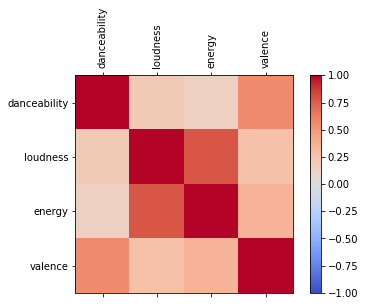

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

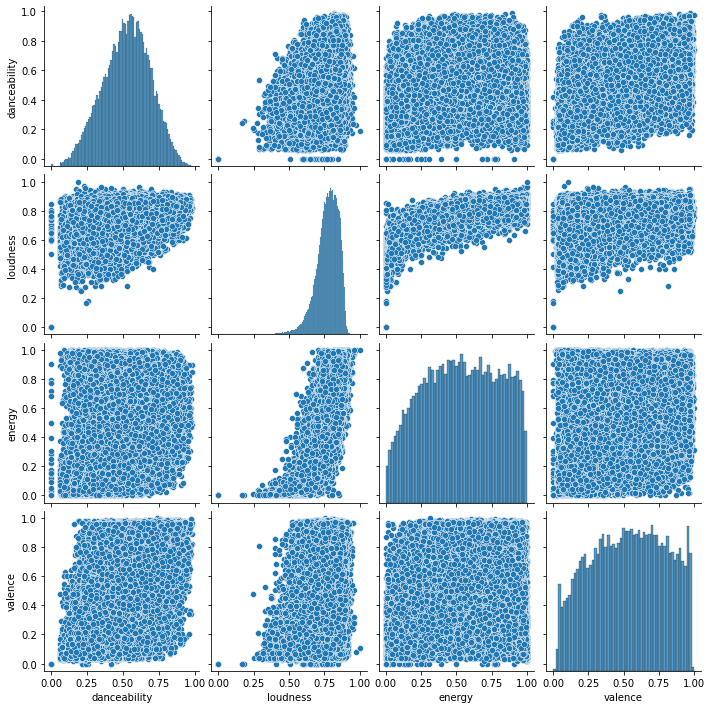

In [10]:
sns.pairplot(data, kind="scatter")

plt.show()

Since the greatest corr coef are betwwn (danceability vs valence ) and (energy vs loudness) we will conduct a regression analysis : 

In [11]:
from scipy.stats import linregress

linregress(data['valence'], data['danceability'])

LinregressResult(slope=0.35737241024602684, intercept=0.33574036588088074, rvalue=0.5632692465399803, pvalue=0.0, stderr=0.001671737462882296)

In [12]:
linregress(data['energy'], data['loudness'])

LinregressResult(slope=0.23608172822456408, intercept=0.6464023361052263, rvalue=0.785392165973945, pvalue=0.0, stderr=0.000593341497190938)